In [1]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf');

font = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Avenir.ttf')

In [3]:
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': r"\usepackage{amsmath}"})

In [4]:
# downloading numerical results:
# see ../numerics

with open('../numerics/lambda_rho_neutral.txt') as f:
    lambda_rho_neutral = dict([list(map(float, x.split())) for x in f.readlines()[1:]])

In [5]:
# downloading simulation results:
# see ../simulations

N = 1e6
s = [1e-4, 1e-3, 1e-2]

points = {}
for regime in ['r', 'r_selAB=1e-4', 'r_selAB=1e-3', 'r_selAB=1e-2', 'r_anteps=1e-2']:
    
    points[regime] = {}
    points[regime]['fs'] = np.load('../simulations/out/%s_fstars.npy' % regime)
    points[regime]['rs'] = np.load('../simulations/out/%s_rs.npy' % regime)
    points[regime]['nums'] = np.load('../simulations/out/%s_numers.npy' % regime)
    points[regime]['denoms'] = np.load('../simulations/out/%s_denoms.npy' % regime)
    

In [6]:
# strong selection result
# see strong selection/recombination appendix in the paper

def lambda_bar(rho, gamma_a, gamma_b, gamma_ab):
    return rho/(rho+gamma_a+gamma_b+gamma_ab) * (1 + 
                                                 gamma_a*(rho+gamma_a)/((rho+gamma_b+gamma_ab)*(rho+gamma_b/2+gamma_ab)) + 
                                                 gamma_b*(rho+gamma_b)/((rho+gamma_a+gamma_ab)*(rho+gamma_a/2+gamma_ab)) +
                                                 4*rho*gamma_a*gamma_b*(rho+gamma_a+gamma_b)*(rho+gamma_a/2+gamma_b/2+gamma_ab)/((rho+gamma_a+gamma_ab)*(rho+gamma_b+gamma_ab)*(rho+gamma_ab)**3))






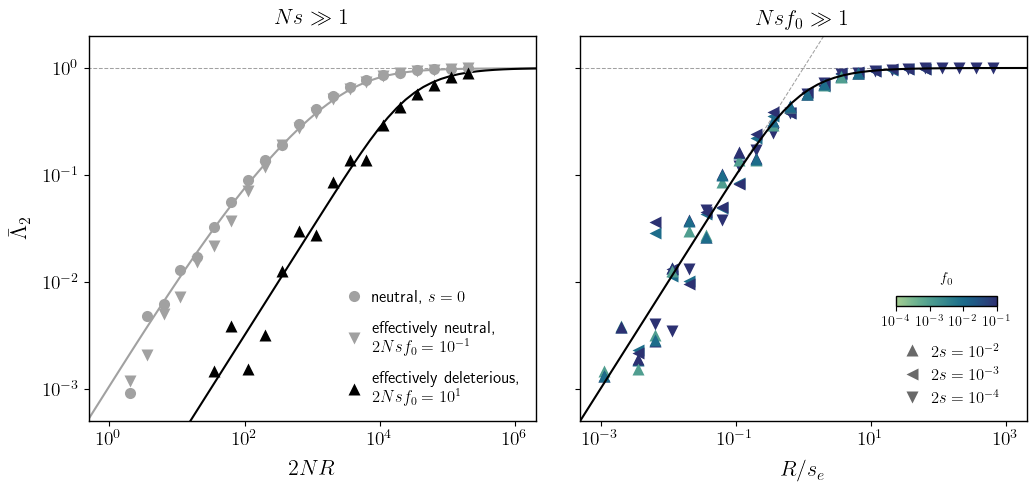

In [7]:
matplotlib.rcParams['axes.linewidth'] = 1

fig = plt.figure(figsize=(12.1, 5))

grid = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.1,
                         height_ratios=[1], hspace=0.1)

cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-4, vmax=-1),cmap=sns.color_palette("crest", as_cmap=True))
grey = '#a1a1a1'  
dark_grey = '#696969'
w = 1.5 # linewidth

for c in range(2):
    
    plt.subplot(grid[c // 2, c % 2])
    
    # left panel
    if c == 0: 

        rhos_neutral = np.logspace(-4.5, 4.5, int(1e2)) # 2NRf_0, these should correspond to values used in numerics
        nrs_neutral = np.logspace(-1.5, 7.5, int(1e2)) # 2NR

        rhos_sel = np.logspace(-4.5, 8.5, int(1e2)) # 2NRf_0
        nrs_sel = np.logspace(-3.5, 9.5, int(1e2))# 2NR

        # if f_0 = 0.1 and N = 1e6, this means s = 1e-2
        gamma_a = 1000; gamma_b = 1000; eps = 0; gamma_ab = gamma_a + gamma_b + eps

        # neutral numeric result
        plt.plot(nrs_neutral, [lambda_rho_neutral[x] for x in rhos_neutral], color=grey, linewidth=w, zorder=-1)
        
        # selection result
        plt.plot(nrs_sel, [lambda_bar(x, gamma_a, gamma_b, gamma_ab) for x in rhos_sel], color='#000000', linewidth=w, zorder=1)
        
        # line at 1
        plt.loglog(np.logspace(-6,8,25), np.ones_like(np.logspace(-6,8,25)), '--', color=grey, linewidth=w/2, zorder=-1)


        # adding data
        
        # neutral
        regime = 'r'
        
        # this is for the legend
        plt.loglog([1e-10], [1e-10], 'o', markersize=8, markeredgecolor='#00000000', markerfacecolor=grey, label='neutral, ' + '$s=0$')

        xs = []; ys = []
        for j, f in enumerate(points[regime]['fs'][:-7]):
            if f != 0.001:
                continue
    
            for i, r in enumerate(points[regime]['rs']):
                if r < 5e-6 or r > 0.003: 
                    continue
                    
                xs = []; ys = []  
                for i, r in enumerate(points[regime]['rs']):     
                    xs.append(2 * N * r)
                    ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
        
        
            plt.loglog(xs, ys, 'o', markersize=8, markeredgecolor='#00000000', markerfacecolor=grey, zorder=1) 
        
        # weakly deleterious
        regime = 'r_selAB=1e-4'; s = 1e-4
        
        # this is for the legend
        plt.loglog([1e-10], [1e-10], 'v', markersize=8, markeredgecolor='#00000000', markerfacecolor=grey, label='effectively neutral,\n' + '$2Nsf_0 = 10^{-1}$')

        for j, f in enumerate(points[regime]['fs'][:-7]):
            if f != 0.001:
                continue
            #print(N*s*f, N*s, 1/f)
    
            xs = []; ys = []  
            for i, r in enumerate(points[regime]['rs']):     
                xs.append(2 * N * r)
                ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
        
        
            plt.loglog(xs, ys, 'v', markersize=8, markeredgecolor='#00000000', markerfacecolor=grey, zorder=1) 
        
        # strongly deleterious
        regime = 'r_selAB=1e-2'; s = 1e-2
        
        # this is for the legend
        plt.loglog([1e-10], [1e-10], '^', markersize=8, markeredgecolor='#00000000', markerfacecolor='#000000', label='effectively deleterious,\n' + '$2Nsf_0 =10^1$')

        for j, f in enumerate(points[regime]['fs'][:-7]):
            if f != 0.001:
                continue
            #print(N*s*f, N*s, 1/f)
    
            xs = []; ys = []  
            for i, r in enumerate(points[regime]['rs']):     
                xs.append(2 * N * r)
                ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
                
            plt.loglog(xs, ys, '^', markersize=8, markeredgecolor='#00000000', markerfacecolor='#000000') # label="$s_{A,B} = 10^{-4}$" + ", " + '$f_0=$' + "$10^{" + '{:0.0f}'.format(math.log10(f)) + "}$"


        plt.xticks([1e-2, 1e0, 1e2, 1e4, 1e6], 
                   ['$10^{-2}$', '$10^{0}$', '$10^{2}$', '$10^{4}$', '$10^{6}$'])
        plt.yticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2], 
                   ['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$', '$10^{2}$'])
        plt.ylim([5e-4, 2e0])
        plt.xlim([5e-1, 2e6])

        plt.minorticks_off()
        plt.tick_params(axis='both', labelsize=14)

        plt.ylabel("$\\bar{\\Lambda}_2$", fontsize=16, labelpad=8)
        plt.xlabel(r"$2NR$", fontsize=16, labelpad=8)    
        plt.title(r"$Ns \gg 1$", fontsize=16, pad=8)
        
        plt.legend(frameon=False, fontsize=12, loc='lower right', handletextpad=0.1, labelspacing=1.01);
        
    # right panel    
    if c == 1:
        
        # asymptotics
        plt.loglog(np.logspace(-6.5,5,25), np.ones_like(np.logspace(-6.5,5,25)), '--', color=grey, linewidth=w/2)
        plt.loglog(np.logspace(-6.5,5,25), np.logspace(-6.5,5,25), '--', color=grey, linewidth=w/2)
        
        # theory curve – rescaling since we want R/s_e on the x axis
        plt.plot([19 / 30 * x / gamma_ab for x in np.logspace(-4.5, 8, int(1e2))], [lambda_bar(x, gamma_a, gamma_b, gamma_ab) for x in np.logspace(-4.5, 8, int(1e2))], color='black', linewidth=w, zorder=5) # label='numerics'
    
        regime = 'r_selAB=1e-4'; s = 1e-4
        for j, f in enumerate(points[regime]['fs'][:-7]):
            if f not in [0.1]:
                continue
            color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(f)))
    
            xs = []; ys = []    
            for i, r in enumerate(points[regime]['rs']):     
                xs.append(19 / 30 * r / s)
                ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
        
            plt.loglog(xs, ys, 'v', markersize=8, markeredgecolor='#00000000', markerfacecolor=color) # label="$s_{A,B} = 10^{-2}$" + ", " + '$f_0=$' + "$10^{" + '{:0.0f}'.format(math.log10(f)) + "}$"    
 
    
        regime = 'r_selAB=1e-3'; s = 1e-3
        for j, f in enumerate(points[regime]['fs'][:-7]):
            if f not in [0.01, 0.1]:
                continue
            color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(f)))
    
            xs = []; ys = []  
            for i, r in enumerate(points[regime]['rs']):     
                xs.append(19 / 30 * r / s)
                ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
        
            plt.loglog(xs, ys, '<', markersize=8, markeredgecolor=color + '00', markerfacecolor=color) # label="$s_{A,B} = 10^{-3}$" + ", " + '$f_0=$' + "$10^{" + '{:0.0f}'.format(math.log10(f)) + "}$"

        regime = 'r_selAB=1e-2'; s = 1e-2        
        xs = []; ys = []; cs = []
        for j, f in enumerate(points[regime]['fs'][:-7]):
            if f not in [0.001, 0.01, 0.1]:
                continue
            color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(f)))
      
            for i, r in enumerate(points[regime]['rs']):     
                xs.append(19 / 30 * r / s)
                ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
                cs.append(color)
                       
        # reshuffling points before plotting
        random.seed(123)        
        idx = sorted(range(len(xs)), key=lambda x: random.random()) 
        for i in idx:
            plt.loglog(xs[i], ys[i], '^', markersize=8, markeredgewidth=0.5, markeredgecolor=cs[i] + '00', markerfacecolor=cs[i]) # label="$s_{A,B} = 10^{-2}$" + ", " + '$f_0=$' + "$10^{" + '{:0.0f}'.format(math.log10(f)) + "}$"    
        
        # this is for the legend
        plt.loglog([1e-5], [1e-5], '^', markersize=8, markeredgecolor='#00000000', markerfacecolor=dark_grey, label="$2s = 10^{-2}$")
        plt.loglog([1e-5], [1e-5], '<', markersize=8, markeredgecolor='#00000000', markerfacecolor=dark_grey, label="$2s = 10^{-3}$")
        plt.loglog([1e-5], [1e-5], 'v', markersize=8, markeredgecolor='#00000000', markerfacecolor=dark_grey, label="$2s = 10^{-4}$")

    
        plt.xticks([1e-3, 1e-1, 1e1, 1e3], 
                   ['$10^{-3}$', '$10^{-1}$','$10^{1}$', '$10^{3}$'])
        plt.yticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0], 
                   [])
        plt.ylim([5e-4, 2])
        plt.xlim([5e-4, 2e3])

        plt.minorticks_off()
        plt.tick_params(axis='both', labelsize=14)

        plt.xlabel(r"$R / s_e$", fontsize=16, labelpad=8)   
        plt.title(r"$Nsf_0 \gg 1$", fontsize=16, pad=8)
            
        plt.legend(frameon=False, fontsize=12, loc='lower right', bbox_to_anchor=(0.4725, 0.0, 0.5, 0.5), handletextpad=0.1);
                
        cbar_ax2 = fig.add_axes([0.792, 0.34, 0.083, 0.02])
        cbar = plt.colorbar(cmap, alpha=1, cax=cbar_ax2, orientation='horizontal', shrink=0.5, ticks=[-4, -3, -2, -1])
        cbar.ax.set_xticklabels(['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$']);
        cbar.set_label('$f_0$', labelpad=-40, y=0.45)

plt.savefig('fig3.pdf',dpi=600,bbox_inches='tight') 